<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-machine-learning/blob/main/load_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importaciones
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:

# Carga de base de datos
data = load_wine()
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [6]:
# Variables para el modelo
X = data.data
y = (data.target == 0).astype(int)  # Conversión binaria
feature_names = data.feature_names
target_names = ["Not Class 0", "Class 0"]

In [7]:

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [25]:

# Modelo
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
# Predicción
y_pred = model.predict(X_test)

accuracy score: 0.9259259259259259
confusion matrix:
 [[35  1]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.94      0.83      0.88        18

    accuracy                           0.93        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.93      0.93      0.92        54



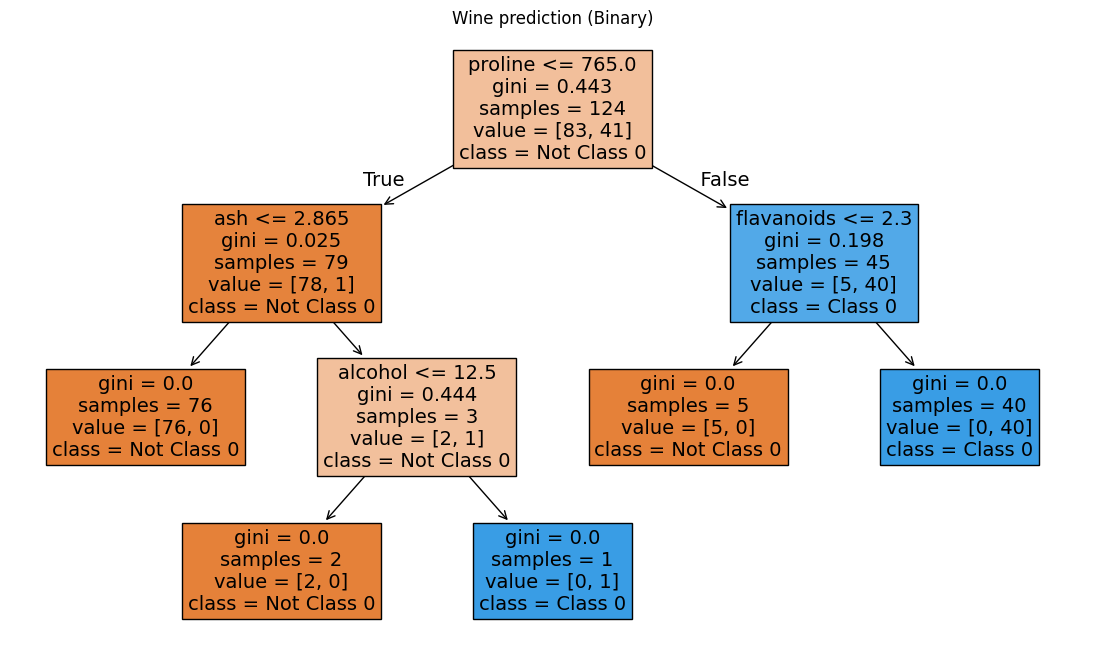

In [27]:
# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score: {accuracy}")
print(f"confusion matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Gráfica del modelo
plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    fontsize=14
)
plt.title("Wine prediction (Binary)")
plt.show()